## First things first
We review the gradient descent method learned in last quarter, for minimization of $f(x)$, the Gradient Descent (GD) iteration is 
$$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$$
with $\alpha_k$ the chosen step length, usually a backtracking type loop is associated for the choice of $\alpha_k$. 



## Incremental GD
There are some variants of GD, like coordinate gradient descent or the stochastic gradient descent. Here we focus on the IGD: incremental GD, it is similar to the coordinate GD, which is dealing with something local and then deal with something else later. 

Suppose the problem is:
$$\min_x f(x) := \sum_{i=1}^m f_i(x)$$
the objective function is the summation of a few other objective functions. This is quite normal in real life applications. Especially the statistics and imaging science. 

The IGD is dealing with one of the $f_i$ with GD and then deal with others in similar manner. Suppose we have fixed an ordering $i_0, i_1, i_2, \dots, i_k,\dots$, this ordering is infinite or finite, the numbers are just sampled from $\{ 1,2,\dots, m\}$, basically telling you an order of $f_i$ to deal with. During each iteration, we update $x_k$ by

$$x_{k+1} = x_{k} - \gamma_k \nabla f_{i_k}(x_{k})$$
where $\gamma_k$ is the step length.  

When the ordering is sampled uniformly from $\{ 1,2,\dots, m\}$, then this method becomes **Stochastic GD**. But the ordering could be other kind or distribution, even deterministic, we will mainly focus on select a better strategy for the ordering.

## Implementation Task 1

This task comes from the Section 2.1 of the reference paper.

We implement the 1D example of least square problem for the IGD. Then problem is given by 

$$\min_x \frac{1}{2}\sum_{i=1}^n (x- y_i)^2$$
where $y_i$ is a sequence of scalars sampled with certain given mean value $\mu$ and variance $\sigma^2$. Following the above method, the iteration will be
$$x_{k+1} =x_k -\gamma_k (x_{k} - y_{i_k})$$
where $y_{i_k}$ comes from the selected ordering.  

In the first task, you need to implement the following functions. 

# Random or not so random?

In the project, you will study the optimization algorithms related to the randomization. For a group of random algorithms, the randomness could be improved through certain strategy. The reference for this project comes from https://arxiv.org/pdf/1202.4184.pdf . 

The mathematical problem discussed in the above paper is quite simple, however it provides some insights for data science, especially for linear problems. The conjecture in the paper is still an open problem in general.

In [1]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
from math import sqrt
def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        # write your code here.
        return np.random.uniform(mu-sigma/sqrt(3), mu+sigma/sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

### Settings of the minimization problems
Now you will setup the problem with a sampling of $y$ vector with the following two different settings:
```
n, mu, sigma, dist = 105, 0.5, 1.0, "normal"
```
and 
```
n, mu, sigma, dist = 105, 0.5, 1.0, "uniform"
```
Your initial guess will be $x_0 = 0$ for both cases. The step length is taking the diminishing factor $\gamma_k = \frac{1}{k+1}$.

In [2]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

### Two orderings to experiment with

1. Random ordering with replacement
In this case, we do not choose the fixed ordering, we sample a number in $\{1,2,\dots, n \}$ each time and follow the iteration.

2. Random ordering without replacement
In this case, we do not choose the fixed ordering, we sample an ordering without replacement from $\{1,2,\dots, n\}$ and then follow the iteration.

In [3]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0 
    x = 0
    
    for i in range(n):
      cur_obj = cur_obj + 0.5*(x-y[ordering[i]])**2
      x = x -(x-y[ordering[i]])/(i+1)
      obj.append(cur_obj)                          
    return x, obj



# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0 
    x = 0
    
    for i in range(n):
      cur_obj = cur_obj + 0.5*(x-y[ordering[i]])**2
      x = x -(x-y[ordering[i]])/(i+1)
      obj.append(cur_obj)                          
    return x, obj

### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task1`` and ``IGD_wo_task1``) of objective functions in the same figure. 

Conclude which strategy is better from the results. 

Briefly prove the ``IGD_wo_task1`` must converge to the true solution (mean value of ``y``). You can calculate first a few values of $x_k$ by hand to see why.

Firstly, we prove that ``IGD_wo_task1`` must converge to the true solution (mean value of ``y``). Note if taken without replacement and start from $$x_0=0$$, we have $$x_k = \frac{1}{n}\sum_{i=1}^n y_{ik}$$
And by central limit theorem, $\frac{1}{n}\sum_{i=1}^n y_{ik}$ converges to $\mu$ as n approaches infinity

the final xk for IGD_wr_task1 on y1 is: 0.46593736031634536
the final xk for IGD_wo_task1 on y1 is: 0.4829131759877189


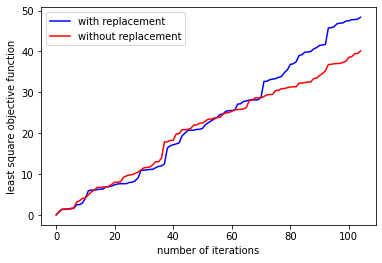

In [4]:
import matplotlib.pyplot as plt
# plot normal distribution
xkr1, objr1 = IGD_wr_task1(y1)
xko1, objo1 = IGD_wo_task1(y1)
print('the final xk for IGD_wr_task1 on y1 is: {}'.format(xkr1))
print('the final xk for IGD_wo_task1 on y1 is: {}'.format(xko1))
plt.plot([i for i in range(len(y1))], objr1, c='blue', label='with replacement')
plt.plot([i for i in range(len(y1))], objo1, c='red', label = 'without replacement')
plt.xlabel("number of iterations")
plt.ylabel("least square objective function")
plt.legend(loc='upper left')
plt.show()



From the above graph, we can see that without replacement converges faster. Note that we did not divide n, the number of iterations, in our objective function, so the objective function seems increasing. 

the final xk for IGD_wr_task1 on y2 is: 0.538209908152975
the final xk for IGD_wo_task1 on y2 is: 0.49097846303901627


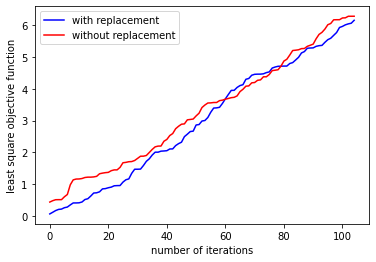

In [6]:
import matplotlib.pyplot as plt
# plot uniform distribution
xkr2, objr2 = IGD_wr_task1(y2)
xko2, objo2 = IGD_wo_task1(y2)
print('the final xk for IGD_wr_task1 on y2 is: {}'.format(xkr2))
print('the final xk for IGD_wo_task1 on y2 is: {}'.format(xko2))
plt.plot([i for i in range(len(y2))], objr2, c='blue', label='with replacement')
plt.plot([i for i in range(len(y2))], objo2, c='red', label = 'without replacement')
plt.xlabel("number of iterations")
plt.ylabel("least square objective function")
plt.legend(loc='upper left')
plt.show()

### Conclusion
Again, we can see that without replacement converges faster.

## Implementation Task 2

This task comes from the Section 2.1 of the reference paper as well. 

Instead of the problem in Task 1, we consider another problem, which is quite simple.

$$\min_x \frac{1}{2}\sum_{i=1}^n \beta_i (x - y)^2$$
here $\beta_i$ are positive weights, $y$ is a scalar. Clearly the minimum is at $x = y$. We try to use the IGD to solve the problem. 

$$x_{k+1} = x_k - \gamma_k \beta_{i_k} (x_k - y)$$

where $\gamma_k\equiv \gamma = 0.95 \min \beta_i^{-1}$. For simplicity, the $\beta_i$ are sampled uniformly between $[1,2]$. Your task2 is the same as the task1,  use two kinds of ordering to solve the problem and compare the results through figures.

In [7]:
# IGD, the ordering is permitted to have replacement. 
#
#
import random
def IGD_wr_task2(beta, y=0.5):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0 
    x = 0
    for i in range(n):
      cur_obj = cur_obj + 0.5*beta[ordering[i]]*(x-y)**2
      x = x -beta[ordering[i]]*(x-y)*0.95
      obj.append(cur_obj)                          
    return x, obj


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(beta, y=0.5):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0 
    x = 0
    for i in range(n):
      cur_obj = cur_obj + 0.5*beta[ordering[i]]*(x-y)**2
      x = x -beta[ordering[i]]*(x-y)*0.95
      obj.append(cur_obj)                          
    return x, obj

### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task2`` and ``IGD_wo_task2``) of objective functions in the same figure. 

Conclude which strategy is better from the results. 

the final xk for IGD_wr_task2 on beta is: 0.506523828117854
the final xk for IGD_wo_task2 on beta is: 0.4997182705143584


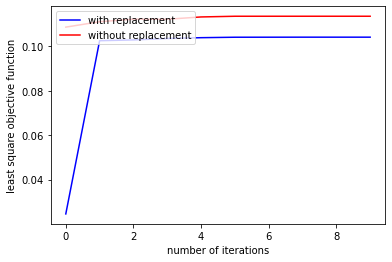

In [11]:
beta = generate_random_numbers(10, 1, 2, "uniform")
import matplotlib.pyplot as plt
xkr3, objr3 = IGD_wr_task2(beta)
xko3, objo3 = IGD_wo_task2(beta)
print('the final xk for IGD_wr_task2 on beta is: {}'.format(xkr3))
print('the final xk for IGD_wo_task2 on beta is: {}'.format(xko3))
plt.plot([i for i in range(len(beta))], objr3, c='blue', label='with replacement')
plt.plot([i for i in range(len(beta))], objo3, c='red', label = 'without replacement')
plt.xlabel("number of iterations")
plt.ylabel("least square objective function")
plt.legend(loc='upper left')
plt.show()


### Conclusion

As we can see without replacement converges faster. Also we point out some error in the skeleton code, since we are sampling beta and treat y as scalar constant, we really should take beta array as input instead of y array in the function IGD_wr_task2 and IGD_wo_task2

## Implementation Task 3

Now instead of 1D problem considered in above two tasks, we will consider the general case in higher dimensions, we study the least square problem to find solution of 
$$Ax = y$$
where $A$ is an $m\times n$ matrix and $x$ is a vector in $\mathbb{R}^n$. In most cases, $m \ge n$ which means the measurement is redundant for this linear model.  We denote the $i$th column $A^T$ as $a_i$ (namely the $i$th row of $A$ transposed), then we are minimizing

$$\min_x \sum_{i=1}^m (a_i^T x - y_i)^2$$
each $a_i\in\mathbb{R}^n$. 

And using IGD to minimize above problem with certain ordering. The step size $\gamma$ is  taken as a fixed constant, say $10^{-3}$, which is a common value for GD. 

Each iteration will be 

$$x_{k+1} = x_k - \gamma a_{i_k} (a_{i_k}^T x_{k} - y_{i_k})$$

Your initial guess is still all zeros vector. 


### Generation of $y$
The $y$ vector is generated by taking the following form
$$y_i = a_i^T x^{\ast} + w_i$$
where $w_i$ obeys normal distribution of zero mean and variance of $\rho^2$, here $\rho = 10^{-2}$. 

In [12]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [13]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [14]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0
    m = A.shape[0]
    n = A.shape[1] 
    x = np.zeros(n)
    ordering = np.random.choice(m, m, replace=True)
    for i in range(m):
      cur_obj = cur_obj + (A[ordering[i]]@x - y[ordering[i]])**2
      x = x -0.001*(A[ordering[i]]@x - y[ordering[i]])*A[ordering[i]]
      obj.append(cur_obj)                          
    return x, obj


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    cur_obj = 0
    m = A.shape[0]
    n = A.shape[1] 
    x = np.zeros(n)
    ordering = np.random.choice(m, m, replace=False)
    for i in range(m):
      cur_obj = cur_obj + (A[ordering[i]]@x - y[ordering[i]])**2
      x = x -0.001*(A[ordering[i]]@x - y[ordering[i]])*A[ordering[i]]
      obj.append(cur_obj)                          
    return x, obj

### Your results to present
Show your results by plotting two figures. For each cases of the above two settings, you need to plot the histories (``IGD_wr_task3`` and ``IGD_wo_task3``) of objective functions in the same figure.  

Then change your code to plot the histories of $\|x_k - x^{\ast }\|$ and compare the results about the convergences.

Conclude which strategy is better from the results. 

the final xk for IGD_wr_task3 is: [ 0.12340766 -0.00625118  0.23238967  0.1120262   0.09506212 -0.1468257
  0.07069237  0.03618896  0.02003381  0.04543573  0.10153438 -0.03197977
  0.07698739  0.15883766  0.19597754  0.15847036 -0.09013273  0.10847955
  0.10348708  0.12823451  0.22357787  0.20114786  0.00641405  0.00286523
  0.06735431  0.15130254  0.19406398  0.04081447  0.23969223  0.09128912
  0.07851541  0.13948831 -0.01680464  0.00179738  0.18636123 -0.00318923
  0.0901447   0.09446227  0.20988959 -0.00637705 -0.09354094  0.00231734
  0.18806041  0.23205878  0.1015217   0.04831676  0.3282548   0.02644992
  0.10101644 -0.22737296  0.07006123  0.12305081  0.11526876  0.18538964
  0.15597596  0.27349636  0.01807846  0.10200571  0.241266    0.1228163
 -0.00594588 -0.06018827 -0.09658378  0.14566768  0.06365627  0.0325525
  0.23123029  0.03741945  0.07498779  0.12025388  0.27561453 -0.0364012
  0.11407173  0.06472491 -0.00779772  0.05740571 -0.04054173  0.19774932
  0.08413879  0.20519

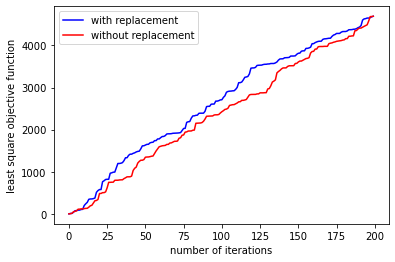

In [15]:
import matplotlib.pyplot as plt
x_trainr, objr = IGD_wr_task3(y, A)
x_traino, objo = IGD_wo_task3(y, A)
print('the final xk for IGD_wr_task3 is: {}'.format(x_trainr))
print('the final xk for IGD_wo_task3 is: {}'.format(x_traino))
plt.plot([i for i in range(A.shape[0])], objr, c='blue', label='with replacement')
plt.plot([i for i in range(A.shape[0])], objo, c='red', label = 'without replacement')
plt.xlabel("number of iterations")
plt.ylabel("least square objective function")
plt.legend(loc='upper left')
plt.show()

As we can see the without replacement converges faster. (Has a lower objective). Now we plot the norm of the residue:


the final xk for IGD_wr_task3 is: [-0.00877883  0.08707874  0.14482051  0.1124263   0.14647291 -0.07371789
  0.10051232  0.02795944 -0.03308179 -0.02543756  0.03108648  0.10200872
 -0.01993128  0.15556887  0.06193673  0.16726723  0.05615821  0.18260143
  0.03442975  0.24551075  0.08620877  0.15647177 -0.00479289  0.04460391
  0.13129491  0.14305137  0.27203746  0.11462026  0.1843354   0.06384347
  0.01570128  0.09057644  0.07812079 -0.02282091  0.02241835  0.16408396
  0.04008669 -0.00296285  0.20528839  0.04837949 -0.10300033 -0.20235026
  0.09813867  0.1428236   0.06030489  0.10854607  0.26901081  0.06041331
  0.21502061  0.03296423  0.17437049  0.10989981  0.18067776  0.26123899
  0.05883421  0.16530383 -0.00809313 -0.0291318   0.16462736  0.1083848
  0.05258387  0.03820794 -0.02747939  0.15275728  0.07943673  0.16658764
  0.1972291  -0.01052067  0.08713879  0.17429308  0.0993891   0.02615595
  0.08001199  0.135891    0.07980421  0.12056083 -0.1024261   0.17710057
  0.07566283  0.13

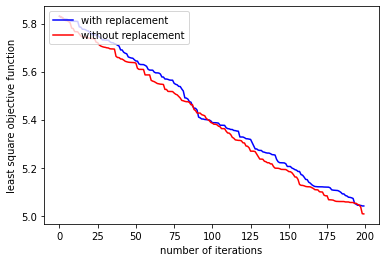

In [16]:
from numpy import linalg as LA
def IGD_wr_task3(y, A, xstar):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    m = A.shape[0]
    n = A.shape[1] 
    x = np.zeros(n)
    ordering = np.random.choice(m, m, replace=True)
    for i in range(m):
      obj.append(LA.norm(xstar-x))
      x = x -0.001*(A[ordering[i]]@x - y[ordering[i]])*A[ordering[i]]
    return x, obj


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A, xstar):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    obj = []
    m = A.shape[0]
    n = A.shape[1] 
    x = np.zeros(n)
    ordering = np.random.choice(m, m, replace=False)
    for i in range(m):
      obj.append(LA.norm(xstar-x))
      x = x -0.001*(A[ordering[i]]@x - y[ordering[i]])*A[ordering[i]]
    return x, obj
x_trainr, objr = IGD_wr_task3(y, A, xstar)
x_traino, objo = IGD_wo_task3(y, A, xstar)
print('the final xk for IGD_wr_task3 is: {}'.format(x_trainr))
print('the final xk for IGD_wo_task3 is: {}'.format(x_traino))
plt.plot([i for i in range(A.shape[0])], objr, c='blue', label='with replacement')
plt.plot([i for i in range(A.shape[0])], objo, c='red', label = 'without replacement')
plt.xlabel("number of iterations")
plt.ylabel("least square objective function")
plt.legend(loc='upper left')
plt.show()

### Conclusion

As we can see, the without replacement has a faster convergence residue norm.